# Kalman Filter, II

This notebook is a continuation of on [KalmanFilter.NET](https://www.kalmanfilter.net/) <cite data-cite="2018:becker"></cite>. In this notebook, we focus on the Kalman Filter in one dimension.

## Kalman Gain Equation

Before, the `Kalman Gain` $K_n$ was held fixed or reduced over time by $\dfrac{1}{n}$. Here $K_n$ changes dynamically and depends on the meaurement device. To start, the `Kalman Gain Equation` $K_n$ is defined as follows.

$K_n = \dfrac{p_{n,n-1}}{p_{n,n-1} + r_n}$,

where

- $p_{n,n-1}$ is the estimation uncertainty (variance)
- $r_n$ is the measurement uncertainty (variance)
- $0 \leq K_n \leq 1$

The `State Update Equation` can be rewritten as follows.

$\begin{array} \hat{x}_{n,n} & = & \hat{x}_{n,n-1} + K_n (z_n - \hat{x}_{n,n-1}) \\ & = &  \hat{x}_{n,n-1} + K_n z_n - K_n \hat{x}_{n,n-1} \\ & = & \hat{x}_{n,n-1} - K_n \hat{x}_{n,n-1} + K_n z_n \\ & = &  (1 - K_n) \hat{x}_{n,n-1} + K_n z_n\end{array}$

When the State Update Equation is written as above, then

- $(1 - K_n)$ is the weight given to the estimate
- $K_n$ is the weight given to the measurement

The `Covariance Update Equation` is given as follows.

$p_{n,n} = (1 - K_n) p_{n,n-1}$

The `Covariance Extrapolation Equations` for the position $x$ and velocity $v$ are give as follows.

- $p^x_{n+1,n} = p^x_{n,n} + \Delta t^2 p^v_{n,n}$
- $p^v_{n+1,n} = p^v_{n,n}$

## Building height, estimation and measurement uncertainties

In [1]:
import pandas as pd

data = []

r = 25      # measurement uncertainty
x_ii = 60   # estimate
p_ii = 225  # estimate uncertainty

x_ji = x_ii # prediction
p_ji = p_ii # prediction uncertainty

Z = [48.54, 47.11, 55.01, 55.15, 49.89, 40.85, 46.72, 50.05, 51.27, 49.95]

for z_i in Z:
    K_i = p_ji / (p_ji + r)
    
    x_ii = x_ji + K_i * (z_i - x_ji)
    p_ii = (1 - K_i) * p_ji
    
    x_ji = x_ii
    p_ji = p_ii
    
    data.append({
        'K_i': K_i,
        'x_ii': x_ii,
        'p_ii': p_ii,
        'z_i': z_i,
        'r_i': r
    })
    
data = pd.DataFrame(data)
data.index = range(1, data.shape[0] + 1)
data

,K_i,x_ii,p_ii,z_i,r_i
1,0.900000,49.686000,22.500000,48.54,25
2,0.473684,48.465789,11.842105,47.11,25
3,0.321429,50.569286,8.035714,55.01,25
4,0.243243,51.683514,6.081081,55.15,25
5,0.195652,51.332609,4.891304,49.89,25
6,0.163636,49.617273,4.090909,40.85,25
7,0.140625,49.209844,3.515625,46.72,25
8,0.123288,49.313425,3.082192,50.05,25
9,0.109756,49.528171,2.743902,51.27,25
10,0.098901,49.569890,2.472527,49.95,25


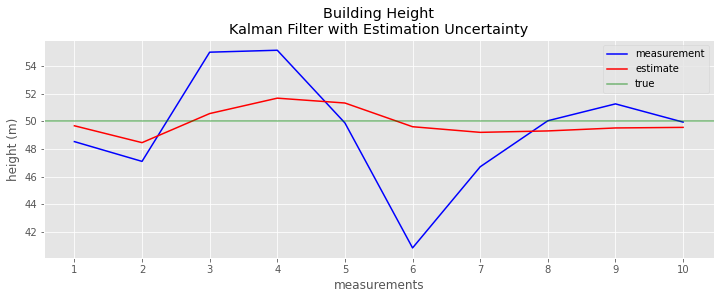

In [2]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(12, 4))

_ = data.z_i.plot(kind='line', ax=ax, color='blue', label='measurement')
_ = data.x_ii.plot(kind='line', ax=ax, color='red', label='estimate')
_ = ax.axhline(50, color='green', alpha=0.5, label='true')
_ = ax.set_xticks(range(1, data.shape[0] + 1))
_ = ax.set_xticklabels(data.index)
_ = ax.legend()
_ = ax.set_xlabel('measurements')
_ = ax.set_ylabel('height (m)')
_ = ax.set_title('Building Height\nKalman Filter with Estimation Uncertainty')

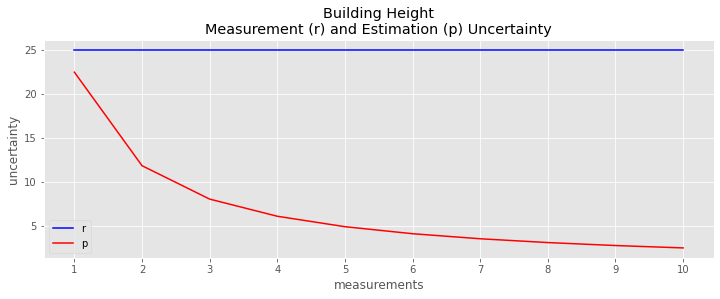

In [3]:
fig, ax = plt.subplots(figsize=(12, 4))

_ = data.r_i.plot(kind='line', ax=ax, color='blue', label='r')
_ = data.p_ii.plot(kind='line', ax=ax, color='red', label='p')
_ = ax.set_xticks(range(1, data.shape[0] + 1))
_ = ax.set_xticklabels(data.index)
_ = ax.legend()
_ = ax.set_xlabel('measurements')
_ = ax.set_ylabel('uncertainty')
_ = ax.set_title('Building Height\nMeasurement (r) and Estimation (p) Uncertainty')

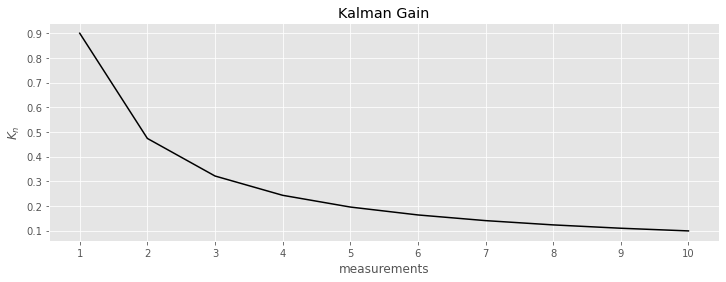

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

_ = data.K_i.plot(kind='line', ax=ax, color='black')
_ = ax.set_xticks(range(1, data.shape[0] + 1))
_ = ax.set_xticklabels(data.index)
_ = ax.set_xlabel('measurements')
_ = ax.set_ylabel(r'$K_n$')
_ = ax.set_title('Kalman Gain')